# Task 1: Generate adversarial examples in the context of the zero-knowledge threat model

## Threat model in deep learning: background and definitions
We focus on deep learning systems that are trained in a supervised setting. This modality of deep neural network (DNN) models unseen samples to a predefined set of outputs, using a function obtained from training with labeled data. Here, we use a machine learning classifier, defined by a function $f(\cdot)$, that receives an input $x$ and output a class probability vector $y$ of all possible classes.  

### Adversarial goals  
The adversary of a deep learning system seeks to provide a modified input $x'$, called an adversarial example, that results in an incorrect output classification (JSMA paper). This form of adversarial sample has the goal of generating inputs that are still correctly classified by humans and classifiers other than the targeted DNN. Adversarial attacks can also be distinguished by how they seek to impact the DNN output integrity: a) reduce output confidence classification; b) modify the output classification to any class other the true class; c) generate an $x'$  that forces the output classification into a specific target class; and d) modify an $x$ so that the resulting $x'$ forces the output classification into a specific target class. The first two goals are referred to as *untargeted* attacks, whereas the last two are referred to as *targeted* attacks.

### Defense
A *defense* has the goal of obtaining a correct prediction even when an adversarial example is the input: $argmax(f(x))=argmax(f(x'))=y$. In the Athena framework, the defense mechanism is a combination of several diverse weak defenses. Within the context of this assignment, however, the target of the attacks will be the *undefended model* $f$ that is trained on the original dataset $D$. Additionally, the performance of another state-of-the-art defense called *Projected Gradient Decent Adversarial Training* (PGD-ADT) was compared to the undefended model and to the vanilla Athena ensemble. The PGD-ADT approach is to train networks on both the inputs $x$ and on PGD adversaries (described below).

## Adversarial attacks: description and experimental settings
We generated adversarial examples using three different attack methods. All three methods are *gradient-based attacks*. In the case of image recognition such as this one, this means that they develop a perturbation vector for the input image by 1) holding constant the model weights and treating the input as variable, and 2) obtaining a gradient correspondent to each pixel. This jointly minimizes the perturbation and maximizes the probability of "fooling" the classifier (i.e., the probability of the input being misclassified).

For each method, we created several variants. These variants were obtained by tuning the attack parameters of each, which are described below.

#### Attack 1: Fast Gradient Sign Method (FGSM)
This method processes adversarial examples as follows:

$$ x' = x + \epsilon \cdot sign(\nabla_xJ(x,y)) $$

where $x'$ is the adversarial image, $J$ is the cost (loss) function of the target model $f$, $\nabla_x$ is the gradient with respect to the input $x$ (original image) with corresponding correct output $y$ (original label), and $\epsilon$ is the magnitude of the perturbation (the change made to the pixels).

Note that the $\epsilon$ parameter is a vector multiplier that ensures the perturbation is small - just large enough to provoke misclassification. We chose values of $\epsilon$ in the range of 0.1 to 1 in increments of 0.1 ($\epsilon$ = 0.1, 0.2, ..., 1.0).

#### Attack 2: Jacobian-based Saliency Map Attack (JSMA)
This method make changes to the input through the use of the *forward derivative*: the gradient of loss with each class labels with respect to all components of the input. In other words, the forward derivative is the Jacobian of the function learned by the DNN. It is used to build *adversarial saliency maps* to determine which input features (e.g., what parts of the image) should be disturbed to maximize classification error. Note that this can be done by either *increasing* or *decreasing* input features (e.g., pixel intensity).
The formulation of the saliency map where we increase high-saliency pixels $x_{(i)}$ is


$$
S(x_{(i)},c) = \left\{
    \begin{array}\\
        0\, \text{if}\, \frac{\partial f(x)_{(c)}}{\partial x_{(i)}}\, <\, 0\, \text{or}\, \displaystyle\sum_{c'\neq c} \frac{\partial f(x)_{(c')}}{\partial x_{(i)}}\ >\ 0 \\
        -\frac{\partial f(x)_{(c)}}{\partial x_(i)}\ \cdot\ \displaystyle\sum_{c'\neq c} \frac{\partial f(x)_{(c')}}{\partial x_{(i)}}\, \text{otherwise.}
    \end{array}
\right.
$$


This approach differs from the FGSM because it reduces the number of perturbations (i.e, the number of pixels it disturbs). We do not report results for this method because after several runs with extreme parameters, none of the results were meaningfully different.

#### Attack 3: Projected Gradient Descent (PGD)
This is an iterative approach that gradually increases the magnitude of the perturbation until the input is misclassified. Like other methods, it aims to minimize the following worst case loss function over all possible perturbations:

$$\rho(\theta)=E_{(x,y)\sim D}\, \bigg[ \max\limits_{\delta\, \in\, S}L(\theta, x + \delta,y) \bigg]$$

The FGSM described previously approaches is an attack for an $l_\inf$-bounded adversary and generates adversarial examples as seen above. Another adversarial approach is a multi-step variant, which is the *projected gradient descent* (PGD) on the negative loss function

$$ x^{t+1} = \prod_{x+S}(x^t\ +\ \alpha sign(\nabla_x L(\theta,x,y))) $$

For the PGD, we generated attacks in two ways:
1. Manipulating the size of the perturbation, $\epsilon$, from 0.1 to 1 in increments of 0.1 with fixed maximum iteration of 10.
2. Manipulating the number of maximum iterations from 10 to 30 by increments of 2 (10,12,14,...,30) with a fixed $\epsilon$ of 0.3.

## Evaluation of results: error rate
Results in terms of error rate by attack method are plotted below. The defenses are coded by color: yellow is the undefended model, green is the Athena ensemble of weak defenses, and blue is the baseline defense model, PGD-ADT. 

The top plot shows the performance of each defense against FGSM adversarial attacks. The undefended model starts ($\epsilon$ = .1) with a 25% error rate and reaches the peak error rate of 92% at $\epsilon$ = 0.4. The Athena and PGD-ADT defenses have essentially equal error rates for $\epsilon$ = 0.1 and 0.2; at $\epsilon$ = 0.3, however, Athena has 67% error rate while PGD-DT has an error rate of 21%. At $\epsilon$ = 0.5 and upwards, all defenses are essentially equivalent with error rates around 90%.

The middle plot shows the performance of each defense against PGD attacks with changing attack intensities, similar as the above. The undefended model has error rate of 65% at $\epsilon$ = 0.1 and sharply reaches 99% at $\epsilon$ = 0.2. Athena and PGD-ADT perform more closely in these scenarios, with their largest difference at $\epsilon$ = 0.4: 23%. Athena and PGD-ADT are equivalent again at $\epsilon$ = 0.6, with an error rate of 88%. For stronger attacks ($\epsilon$ = 0.8 and above), Athena is the defense with smallest error rate, and is 7% more accurate than the other methods.

The last plot demonstrates the change in error rate as the number of iterations is manipulated in PGD attacks with $\epsilon$ = 0.3. The minimum error rate for Athena is 29% at 10 iterations and the maximum error rate is 59% at 30 iterations. For PGD-ADT, the minimum error rate is 18% and the maximum is 33%. Note that the minimum difference between the two methods is 11%, at 10 iterations, and the maximum difference is 26%, at 30 iterations.

<ipython-input-6-c9c488934080>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgsm['nes']=temp
<ipython-input-6-c9c488934080>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgdesp['nes']=temp
<ipython-input-6-c9c488934080>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Text(0.5, 15.0, 'PGD, Changing Max Iteration Value, Epsilons set to 0.3')

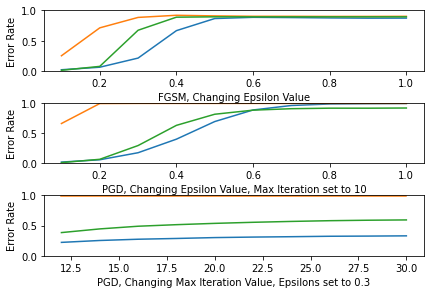

In [6]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter

path = r'C:\Users\raulc\Documents\GitHub\project-athena\notebooks\report\dataOut_task1.csv'

df = pd.read_csv(path, header = None, index_col = None, parse_dates =  True)
df.columns = ['num','ae','UM','BL','Ensemble']
df = df.drop([0])
#eps fgsm['nes'].iloc[x]= "epsof"


fgsm = df.iloc[21::]
i = 0
temp = []
for x in fgsm['ae']:
    temp.append(float(x.split('f')[2].replace(',',"")))
    i+=0
fgsm['nes']=temp

pgdesp = df.iloc[0:10] 

i = 0
temp = []
for x in pgdesp['ae']:
    temp.append(float(x.split('f')[1].replace(',',"")))
    i+=0
pgdesp['nes']=temp

pgditer =df.iloc[11:21] 

i = 0
temp = []
for x in pgditer['ae']:
    temp.append(float(x.split('r')[1].replace(',',"")))
    i+=0
pgditer['nes']=temp

fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.tight_layout()

ax1.plot(fgsm['nes'],np.array(fgsm['BL'],dtype=float))
ax1.plot(fgsm['nes'],np.array(fgsm['UM'],dtype=float))
ax1.plot(fgsm['nes'],np.array(fgsm['Ensemble'],dtype=float)) 
ax1.set_ylim(0,1)
ax1.set_ylabel("Error Rate")
ax1.set_xlabel('FGSM, Changing Epsilon Value')


ax2.plot(pgdesp['nes'],np.array(pgdesp['BL'],dtype=float))
ax2.plot(pgdesp['nes'],np.array(pgdesp['UM'],dtype=float))
ax2.plot(pgdesp['nes'],np.array(pgdesp['Ensemble'],dtype=float)) 
ax2.set_ylim(0,1)
ax2.set_ylabel('Error Rate')
ax2.set_xlabel('PGD, Changing Epsilon Value, Max Iteration set to 10')


ax3.plot(pgditer['nes'],np.array(pgditer['BL'],dtype=float))
ax3.plot(pgditer['nes'],np.array(pgditer['UM'],dtype=float))
ax3.plot(pgditer['nes'],np.array(pgditer['Ensemble'],dtype=float)) 
ax3.set_ylim(0,1)
ax3.set_ylabel('Error Rate')
ax3.set_xlabel('PGD, Changing Max Iteration Value, Epsilons set to 0.3')


#plt.xlim(dates.iloc[1],dates.iloc[-1])
#ax1.set_ylim(0,1)
#ax1.axhline(color='r')
#ax1.set_title("Correct Guess")
#ax1.set_ylabel('Velocity (m/yr)')